# Data Analytics Coursework
**Oliwier Kulczycki**

# Setup

In [27]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.io import arff

In [28]:
path_full = "credits-clean.csv"
df = pd.read_csv(path_full)

bar_width = 0.25

# Dataset Versions

## Converting to numeric
For this task, I decided to use a method which 'enumrates' through every unique value within each column and assigns it an integer.

In [29]:
numeric_full_data = df.copy()
for col in numeric_full_data.columns:
    numeric_full_data[col] = numeric_full_data[col].astype('category').cat.codes

Creates the numeric version of the .csv file.

In [30]:
pd.DataFrame.to_csv(numeric_full_data, "numeric.csv")

# Distribution of Credit Class by Personal Status
- Count the occurrences of 'good' and 'bad' for each unique entry in the 'personal_status' field.
- Group them together for easy displaying.
- Plot as a double bar chart.

## Counts
Using the .value_counts() we can calculate the occurrences of each credit class for each unique personal status.

In [31]:
counts_good_personal_status = df[df['class'] == 'good']['personal_status'].value_counts()
counts_bad_personal_status = df[df['class'] == 'bad']['personal_status'].value_counts()

['good' 'bad']
     Case_no checking_status                  credit_history  \
0          1              <0  critical/other existing credit   
1          2        0<=X<200                   existing paid   
2          3     no checking  critical/other existing credit   
3          4              <0                   existing paid   
4          5              <0              delayed previously   
..       ...             ...                             ...   
995      996     no checking                   existing paid   
996      997              <0                   existing paid   
997      998     no checking                   existing paid   
998      999              <0                   existing paid   
999     1000        0<=X<200  critical/other existing credit   

                 purpose  credit_amount     saving_status     personal_status  \
0               radio/tv         1169.0  no known savings         male single   
1               radio/tv         5951.0              <

## Data Preperation
Plotting is done using a double-bar chart. This way we can more easily and effectively display what is most important. This also acts like a point of comparison between the two credit classes.
A width parameter is necessary to avoid bars overlapping with each other on the same x-values.

### Decoration
First the actual figure is created along with an axes. Some decoration is created; title, and labels.

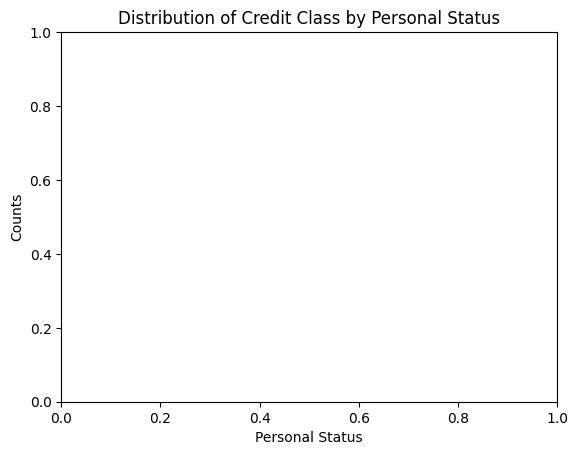

In [32]:
fig_personal_status, g1 = plt.subplots()
g1.set_title("Distribution of Credit Class by Personal Status")
g1.set_xlabel("Personal Status")
g1.set_ylabel("Counts");

# I can't get it to not show the empty graph
    # (at least on PyCharm)

### X-Axis Labels
The X-axis labels have to be evenly arranged, for this the .set_xticks() function is used to tell pyplot where to set the x-axis labels.
The .unique() pandas function is used to get all the unique saving_status entries. These are then used as x-axis labels from where the bar charts will have their roots.

In [33]:
statuses = df['personal_status'].unique()
x = np.arange(len(statuses))
g1.set_xticks(x)
g1.set_xticklabels(statuses)

[Text(0, 0, 'male single'),
 Text(1, 0, 'female div/dep/mar'),
 Text(2, 0, 'male div/sep'),
 Text(3, 0, 'male mar/wid')]

## Plotting

[0 1 2 3]
personal_status
male single           402
female div/dep/mar    201
male mar/wid           67
male div/sep           30
Name: count, dtype: int64


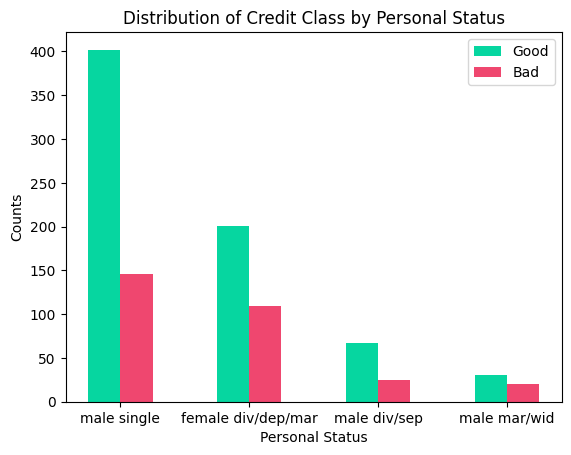

In [34]:
# Plotting the finished data.
print(x)
print(counts_good_personal_status)

g1.bar(x - bar_width/2, counts_good_personal_status, bar_width, label='Good', color='#06d6a0')
g1.bar(x + bar_width/2, counts_bad_personal_status, bar_width, label='Bad', color='#ef476f')
g1.legend()

fig_personal_status

# Distribution of Credit Class by Saving Status
- Count the occurrences of 'good' and 'bad' for each unique entry in the 'saving_status' field.
- Group them together for easy displaying.
- Plot as a double bar chart.
- *(this is the same as the task above just with a different field)*.

## Counting
Counting is done the same way as the chart above.

In [35]:
# Counting
counts_good_saving_status = df[df['class'] == 'good']['saving_status'].value_counts()
counts_bad_saving_status = df[df['class'] == 'bad']['saving_status'].value_counts()

## Data Preperation

### Decoration
First the actual figure is created along with an axes. Some decoration is created; title, and labels.

Text(0, 0.5, 'Counts')

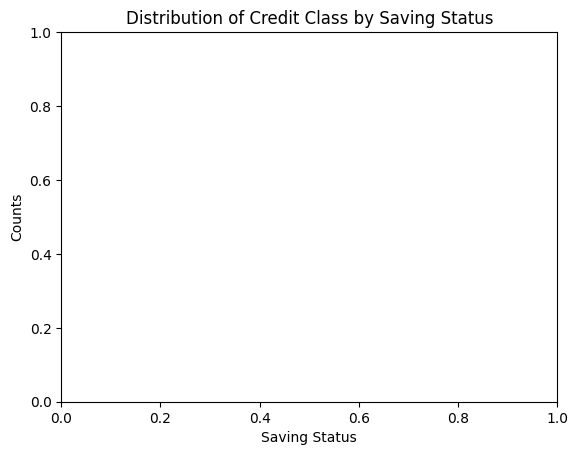

In [36]:
fig_saving_status, g2 = plt.subplots()
g2.set_title("Distribution of Credit Class by Saving Status")
g2.set_xlabel("Saving Status")
g2.set_ylabel("Counts")

### X-Axis Labels
The X-axis labels have to be evenly arranged, for this the .set_xticks() function is used to tell pyplot where to set the x-axis labels.
The .unique() pandas function is used to get all the unique saving_status entries. These are then used as x-axis labels from where the bar charts will have their roots.

In [37]:
statuses = df['saving_status'].unique()
x = np.arange(len(statuses))
g2.set_xticks(x)
g2.set_xticklabels(statuses)

[Text(0, 0, 'no known savings'),
 Text(1, 0, '<100'),
 Text(2, 0, '500<=X<1000'),
 Text(3, 0, '>=1000'),
 Text(4, 0, '100<=X<500')]

## Plotting

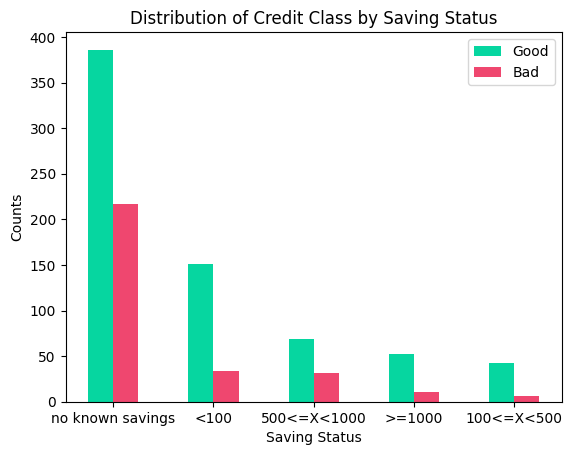

In [38]:
# Plotting here.
g2.bar(x - bar_width/2, counts_good_saving_status, bar_width, label='Good', color='#06d6a0')
g2.bar(x + bar_width/2, counts_bad_saving_status, bar_width, label='Bad', color='#ef476f')
g2.legend()

fig_saving_status